In [52]:
# Import Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import os
print(os.listdir("../input"))

['test.csv', 'train.csv', 'gender_submission.csv']


In [53]:
# Loading data
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
# Combining the datasets
combined = pd.concat([train, test], axis = 0, sort = False)
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
# Check for any null values in combined dataset
combined.isnull().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

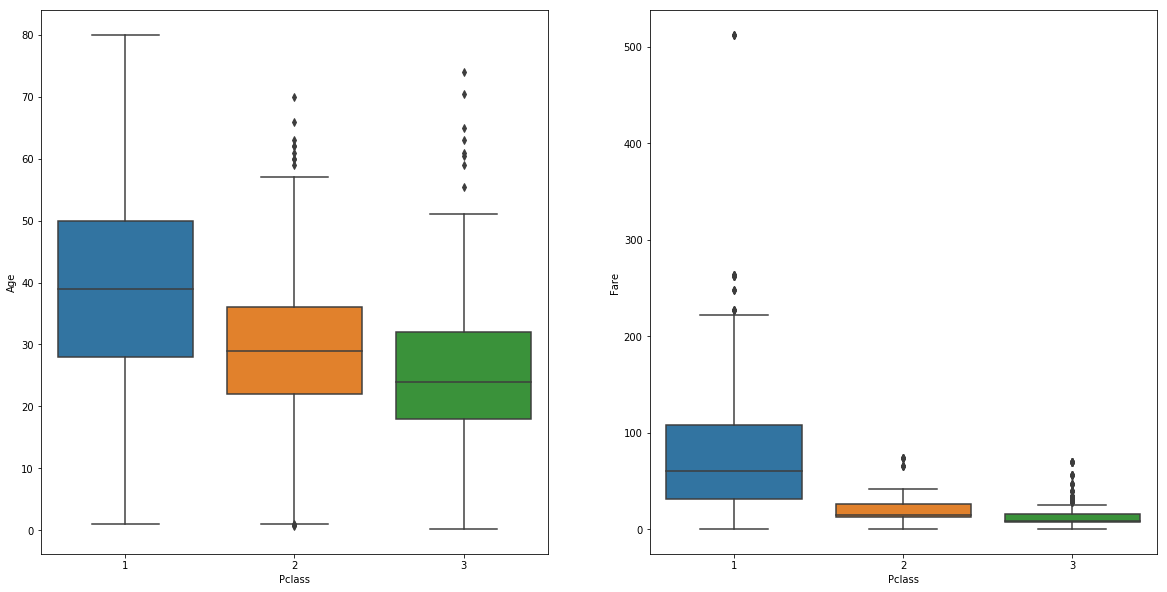

In [58]:
# Box plot of Age and Fare
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(20,10))
sns.boxplot(x= 'Pclass', y='Age', data= combined, ax = axes[0])
sns.boxplot(x= 'Pclass', y = 'Fare', data = combined, ax = axes[1])

In [59]:
# Find the average age for each passenger class
combined.groupby('Pclass', as_index=False)['Age'].mean()

,Pclass,Age
0,1,39.159930
1,2,29.506705
2,3,24.816367


In [60]:
# Find the average fare for each passenger class
combined.groupby('Pclass', as_index = False)['Fare'].mean()

,Pclass,Fare
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [61]:
# Adding the average age for each passenger class for null values in dataset
def fill_null_age(column):
    age = column[0]
    pclass = column[1]
    if pd.isnull(age):
        if pclass == 1:
            return 39
        elif pclass == 2:
            return 30
        else:
            return 25
    else:
        return age
combined['Age'] = combined[['Age', 'Pclass']].apply(fill_null_age, axis = 1)

In [62]:
# Adding the average fare for each passenger class for null values in dataset
def fill_null_fare(column):
    fare = column[0]
    pclass = column[1]
    if pd.isnull(fare):
        if pclass == 1:
            return 88
        elif pclass == 2:
            return 21
        else:
            return 13
    else:
        return fare
combined['Fare'] = combined[['Fare', 'Pclass']].apply(fill_null_fare, axis = 1)

In [63]:
# Check once again for null values in combined dataset
combined.isnull().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [64]:
# Columns in dataset
combined.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

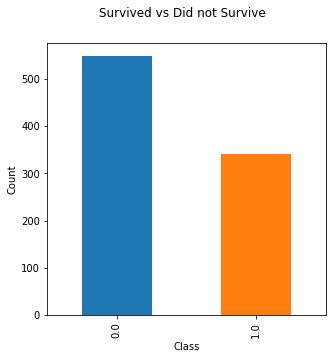

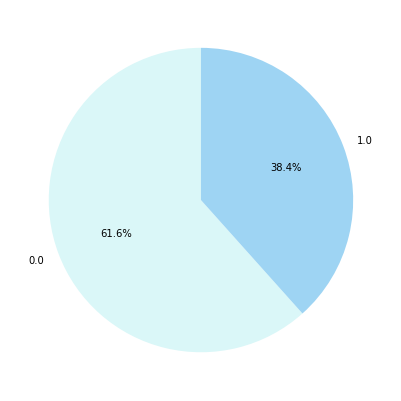

In [65]:
# Survivors vs non-survivors
plt.figure(figsize = (5,5))

plt.suptitle('Survived vs Did not Survive')
plt.xlabel('Class')
plt.ylabel('Count')
combined['Survived'].value_counts().plot.bar()


# Pie chart of passengers who survived vs didn't
plt.figure(figsize = (10,10))
survived_data = combined['Survived'].value_counts()
count = survived_data.values
survive = survived_data.index

labels = survive.tolist()
size = count 

colors = ['#daf7f8', '#9ed4f3']
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

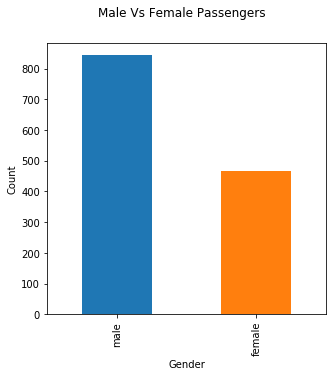

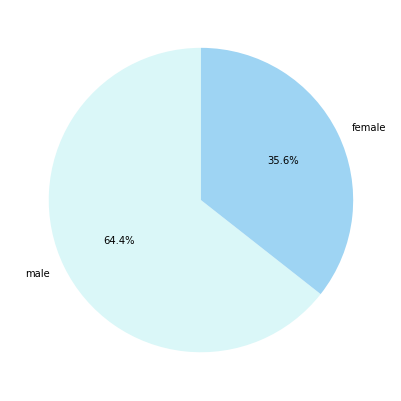

In [66]:
# Male vs Females
plt.figure(figsize = (5,5))

plt.suptitle('Male Vs Female Passengers')
plt.xlabel('Gender')
plt.ylabel('Count')
combined['Sex'].value_counts().plot.bar()

# Pie chart of Male vs Female Passengers
plt.figure(figsize = (10,10))

gender_data = combined['Sex'].value_counts()
count = gender_data.values
gender = gender_data.index

labels = gender.tolist()
size = count 

colors = ['#daf7f8', '#9ed4f3']
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(11.594234664351859, 0.5, 'density')

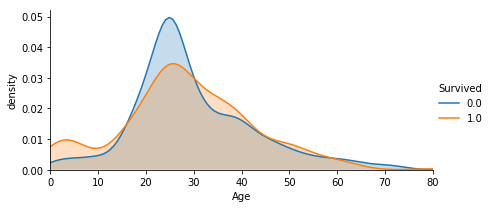

In [67]:
facet = sns.FacetGrid(combined, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, combined['Age'].max()))
facet.add_legend()
plt.xlabel('Age') 
plt.ylabel('density')

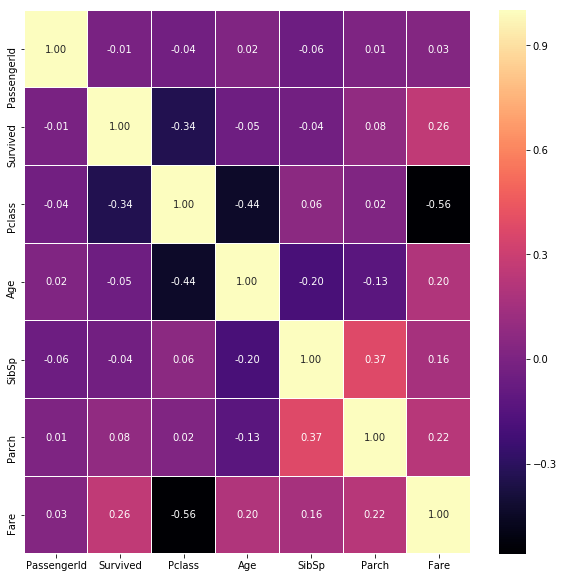

In [68]:
#Correlation between all features
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(combined.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


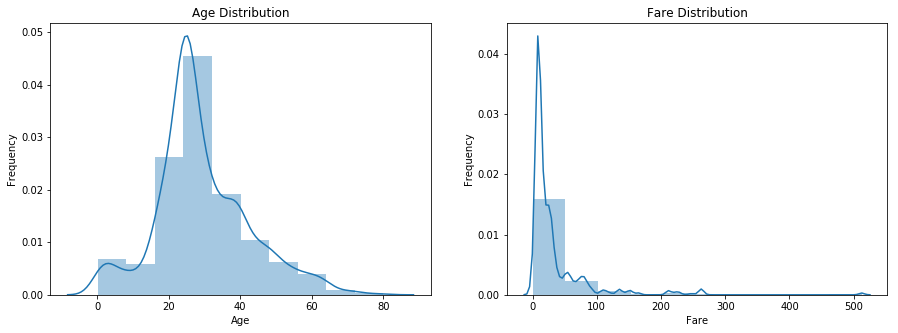

In [69]:
# Viewing the frequency of ages and fares
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
sns.distplot(combined['Age'], bins = 10, kde = True)

plt.subplot(1,2,2)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
sns.distplot(combined['Fare'], bins = 10, kde = True)

Text(0.5, 1.0, 'Survival by sex')

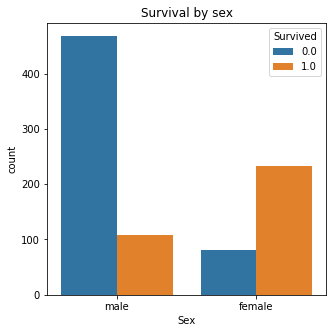

In [70]:
# Survival by gender
plt.figure(figsize=(5,5))
sns.countplot(x='Sex', hue='Survived', data = combined)
plt.title('Survival by sex')

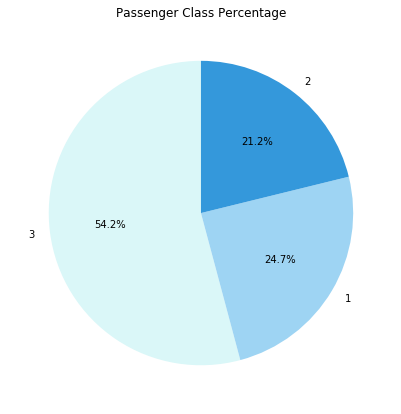

In [71]:
# Passenger class distribution
pclass_data = combined['Pclass'].value_counts()
count = pclass_data.values
pclass = pclass_data.index

labels = pclass.tolist()
size = count 

colors = ['#daf7f8', '#9ed4f3', '#3498DB']
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90)
plt.plot()
plt.title('Passenger Class Percentage')
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

<Figure size 1080x1080 with 0 Axes>

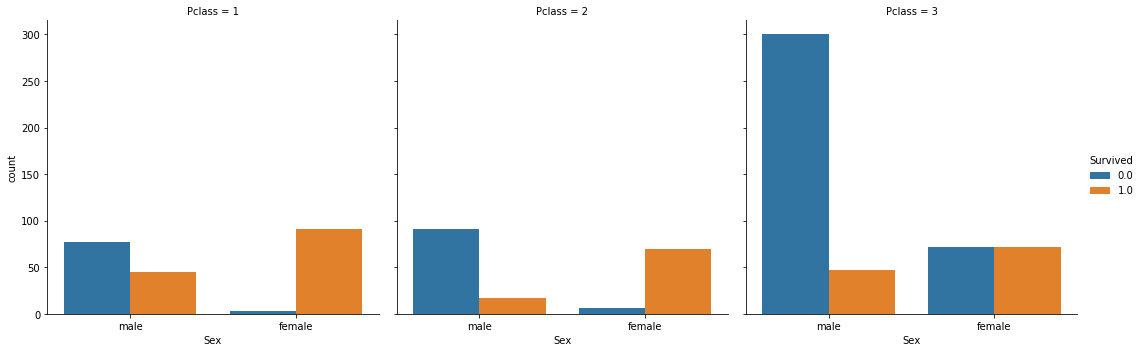

In [72]:
# Survival by gender and Passenger Class
plt.figure(figsize = (15,15))
sns.catplot(x = 'Sex', col='Pclass', hue = 'Survived', kind = 'count' , data = combined)

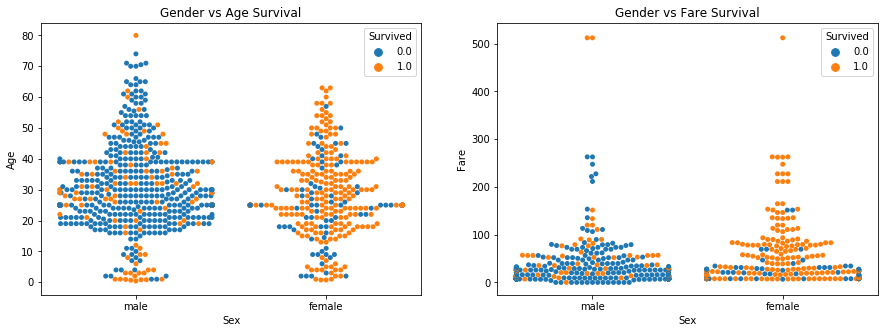

In [73]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Gender vs Age Survival')
sns.swarmplot(x="Sex", y="Age", data= combined, hue="Survived");
plt.subplot(1,2,2)
plt.title('Gender vs Fare Survival')
sns.swarmplot(x='Sex', y="Fare", data= combined, hue = 'Survived')

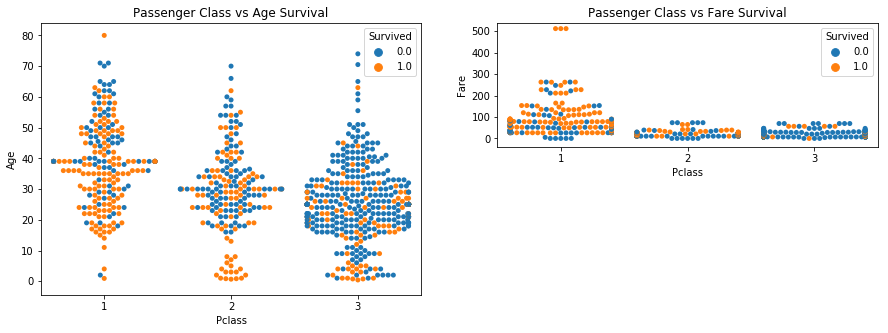

In [74]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Passenger Class vs Age Survival')
sns.swarmplot(x="Pclass", y="Age", data= combined, hue="Survived");
plt.subplot(2,2,2)
plt.title('Passenger Class vs Fare Survival')
sns.swarmplot(x='Pclass', y="Fare", data= combined, hue = 'Survived')

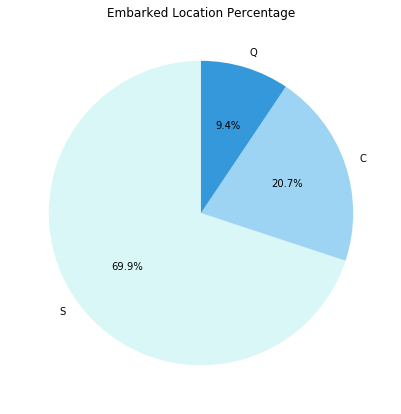

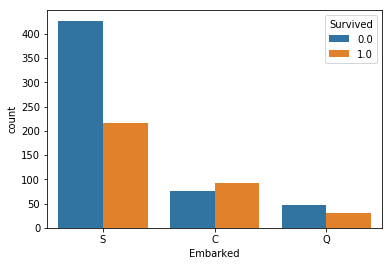

In [75]:
# Embarked location distribution
embark_data = combined['Embarked'].value_counts()
count = embark_data.values
embark = embark_data.index

labels = embark.tolist()
size = count 

colors = ['#daf7f8', '#9ed4f3', '#3498DB']
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90)
plt.plot()
plt.title('Embarked Location Percentage')
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

sns.countplot(x = 'Embarked', data = combined, hue = 'Survived')

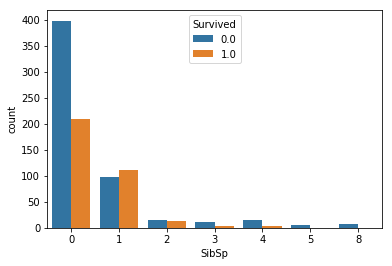

In [76]:
# Siblings bar plot
sns.countplot(x = 'SibSp', data = combined, hue = 'Survived')

<Figure size 1080x1080 with 0 Axes>

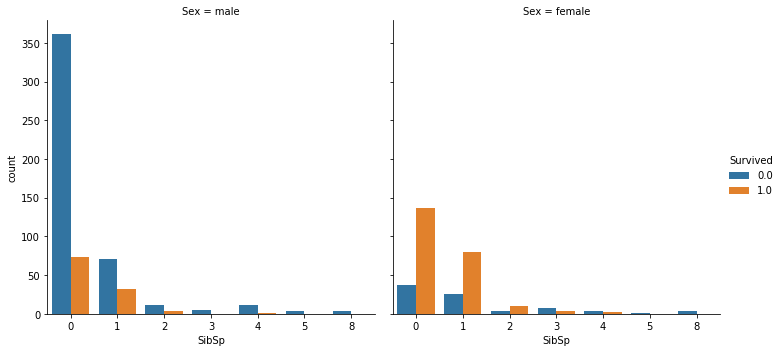

In [77]:
# Male and female siblings
plt.figure(figsize = (15,15))
sns.catplot(x = 'SibSp', col='Sex', hue = 'Survived', kind = 'count' , data = combined)

In [78]:
# Sibling survival for different passenger classes
pclass1 = combined[combined['Pclass'] == 1]
pclass2 = combined[combined['Pclass'] == 2]
pclass3 = combined[combined['Pclass'] == 3]

Text(0.5, 0.98, 'Passenger Class 3')

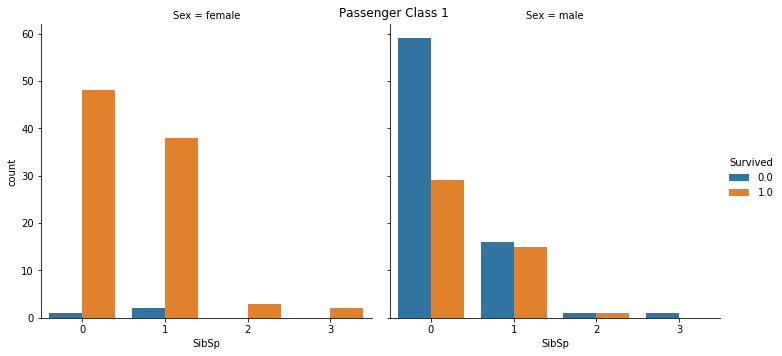

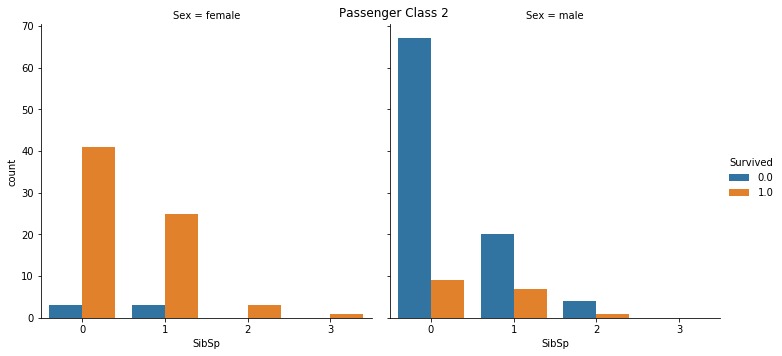

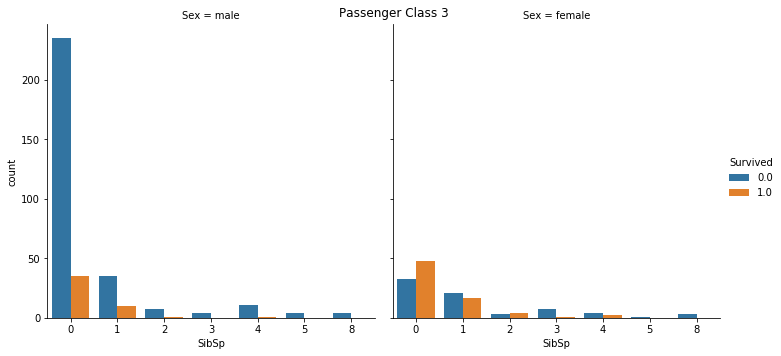

In [79]:
class_1 = sns.catplot(x = 'SibSp', col='Sex', hue = 'Survived', kind = 'count' , data = pclass1)
class_1.fig.suptitle('Passenger Class 1')
class_2 = sns.catplot(x = 'SibSp', col='Sex', hue = 'Survived', kind = 'count' , data = pclass2)
class_2.fig.suptitle('Passenger Class 2')
class_3 = sns.catplot(x = 'SibSp', col='Sex', hue = 'Survived', kind = 'count' , data = pclass3)
class_3.fig.suptitle('Passenger Class 3')

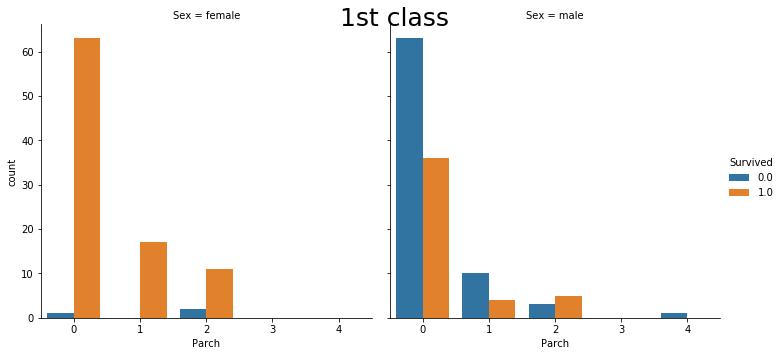

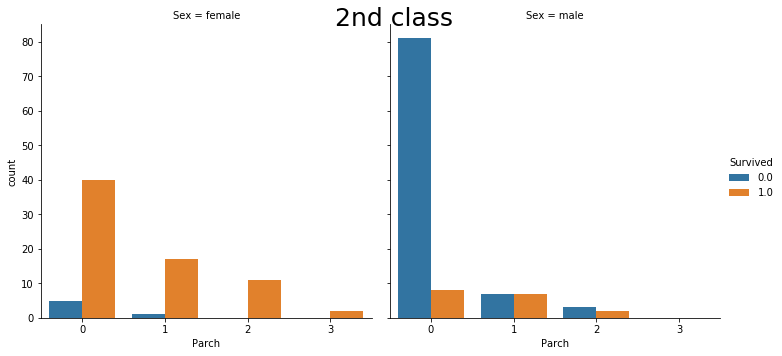

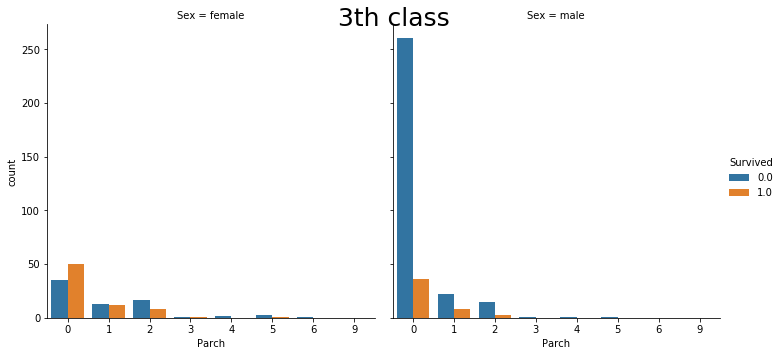

In [80]:
# Family Sizes
parch_1=sns.catplot(x='Parch', hue='Survived', col='Sex', data=pclass1, kind='count')
parch_1.fig.suptitle('1st class', fontsize=25)
plt.show()
parch_2=sns.catplot(x='Parch', hue='Survived', col='Sex', data=pclass2, kind='count')
parch_2.fig.suptitle('2nd class', fontsize=25)
plt.show()
parch_3=sns.catplot(x='Parch', hue='Survived', col='Sex', data=pclass3, kind='count', col_order=['female', 'male'])
parch_3.fig.suptitle('3th class', fontsize=25)
plt.show()

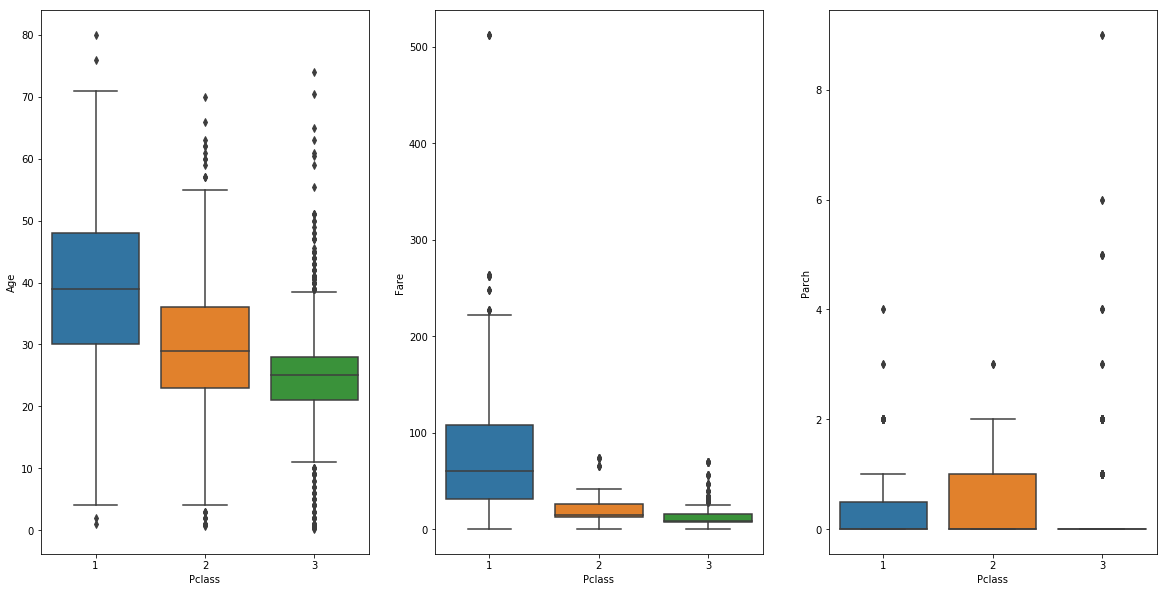

In [81]:
# Boxplots of Age, Fare , and family sizes
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(20,10))

sns.boxplot(x= 'Pclass', y='Age', data= combined, ax = axes[0])
sns.boxplot(x= 'Pclass', y='Fare', data= combined, ax = axes[1])
sns.boxplot(x= 'Pclass', y='Parch', data= combined, ax = axes[2])

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


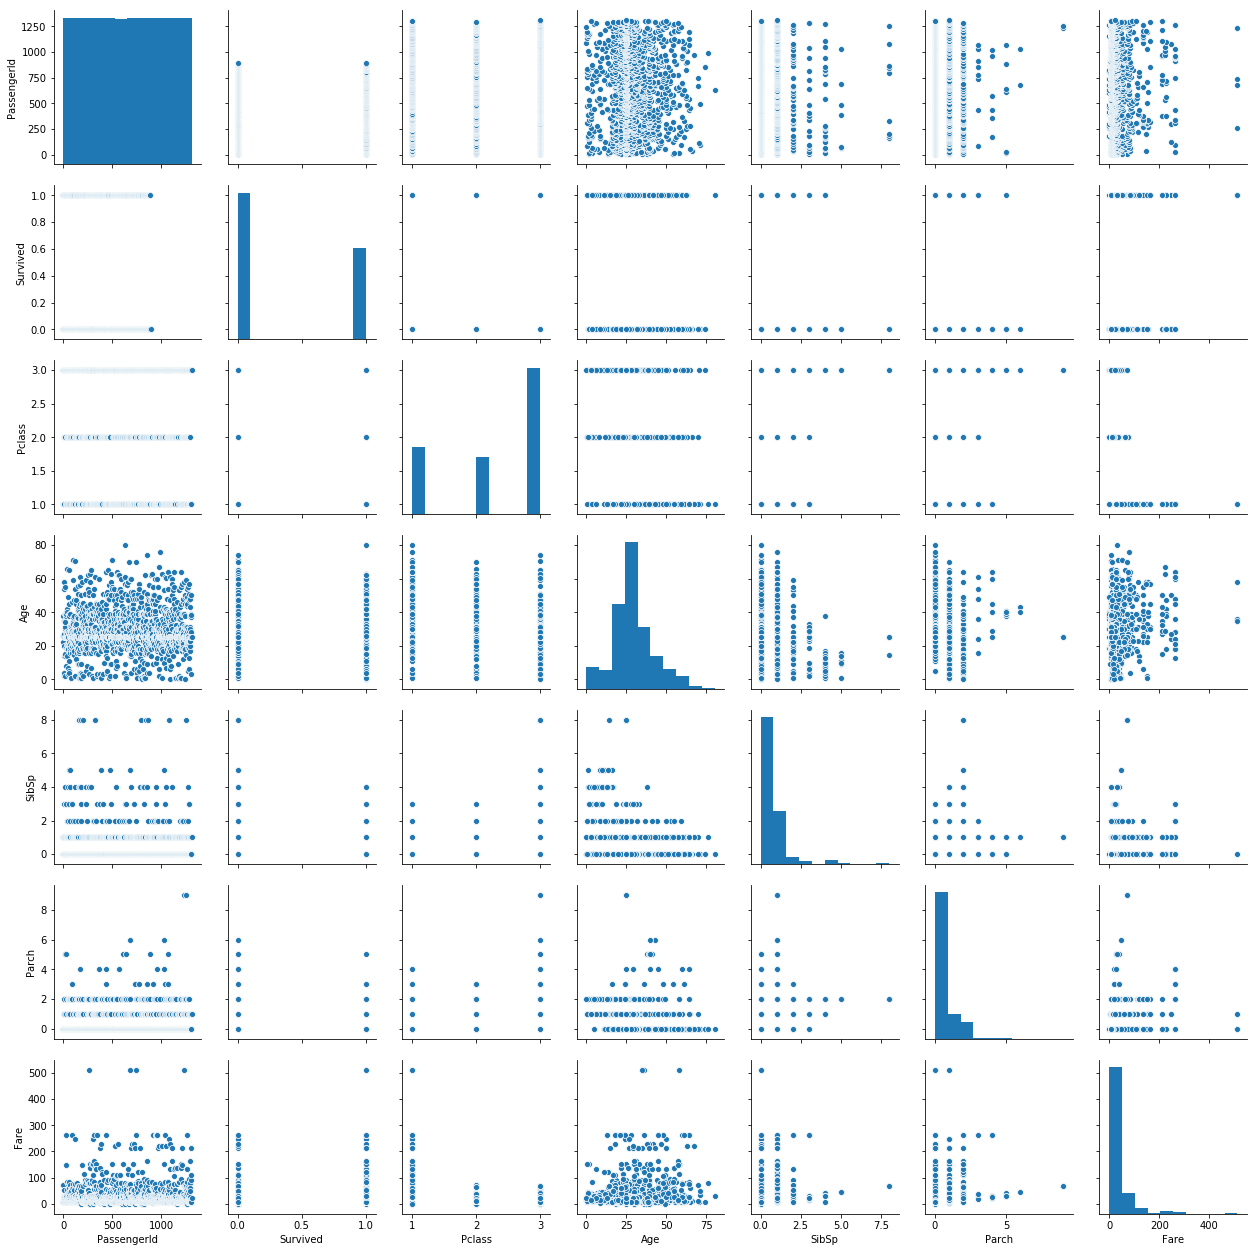

In [82]:
sns.pairplot(combined)

In [83]:
# Looking at the title of names
name_title = [item.split(', ')[1].split('.')[0] for item in combined['Name']]
combined['Title'] = pd.Series(name_title)
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


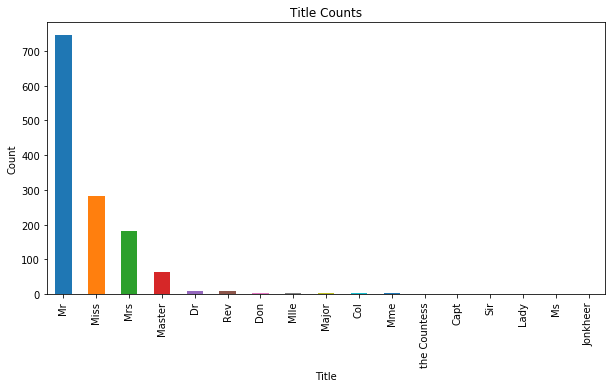

In [84]:
# Bar chart for all the different name titles
plt.figure(figsize = (10,5))
combined['Title'].value_counts().plot.bar()
plt.title('Title Counts')
plt.xlabel('Title')
plt.ylabel('Count')
plt.show()

In [85]:
from collections import Counter

#checking count for titles
Counter(combined['Title'])

Counter({'Mr': 745,
         'Mrs': 183,
         'Miss': 283,
         'Master': 63,
         'Don': 2,
         'Rev': 9,
         'Dr': 10,
         'Mme': 2,
         'Ms': 1,
         'Major': 2,
         'Lady': 1,
         'Sir': 1,
         'Mlle': 2,
         'Col': 2,
         'Capt': 1,
         'the Countess': 1,
         'Jonkheer': 1})

In [86]:
# Replace all titles with less than 10 counts as other
combined['Title'] = combined['Title'].replace(['Don', 'Rev', 'Dr', 'Mme', 
                                               'Ms', 'Major', 'Lady', 'Sir',
                                                       'Mlle', 'Col', 'the Countess', 
                                               'Jonkheer'], 'Other')

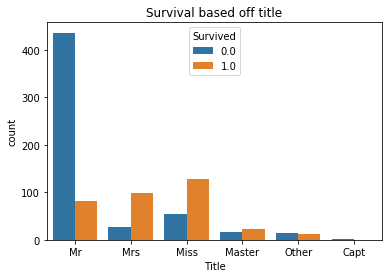

In [87]:
plt.title('Survival based off title')
sns.countplot(x = 'Title', data = combined, hue = 'Survived')

In [88]:
# Convert categorical features
gender_conv = pd.get_dummies(combined['Sex'],drop_first= True)
title_conv = pd.get_dummies(combined['Title'], drop_first = True)

combined.drop(['Sex', 'Title'], axis = 1, inplace = True)

combined = pd.concat([combined, gender_conv, title_conv], axis = 1)
combined.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Master,Miss,Mr,Mrs,Other
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,0,0,0,1,0
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,0,0,1,0,0


In [89]:
# Split data into training and testing sets
train = combined[-combined['Survived'].isnull()]
test = combined[combined['Survived'].isnull()]

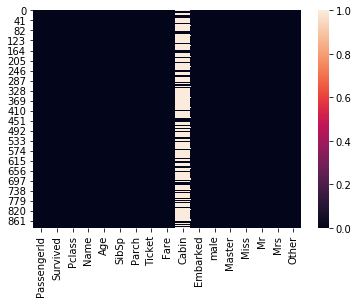

In [90]:
# Heatmap for null values in train
sns.heatmap(train.isnull())

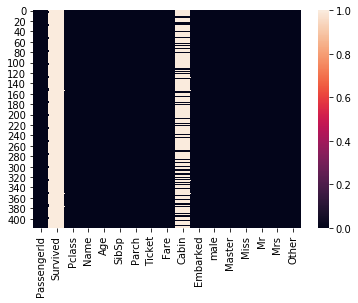

In [91]:
# Heatmap for null values in test
sns.heatmap(test.isnull())

In [92]:
# Dropping columns
train = train.drop(['Embarked', 'Cabin', 'Ticket', 'Name'], axis = 1)
test = test.drop(['Survived', 'Embarked', 'Cabin', 'Ticket', 'Name'], axis = 1)

train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Master,Miss,Mr,Mrs,Other
0,1,0.0,3,22.0,1,0,7.2500,1,0,0,1,0,0
1,2,1.0,1,38.0,1,0,71.2833,0,0,0,0,1,0
2,3,1.0,3,26.0,0,0,7.9250,0,0,1,0,0,0
3,4,1.0,1,35.0,1,0,53.1000,0,0,0,0,1,0
4,5,0.0,3,35.0,0,0,8.0500,1,0,0,1,0,0


In [93]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Master,Miss,Mr,Mrs,Other
0,892,3,34.5,0,0,7.8292,1,0,0,1,0,0
1,893,3,47.0,1,0,7.0000,0,0,0,0,1,0
2,894,2,62.0,0,0,9.6875,1,0,1,0,0,0
3,895,3,27.0,0,0,8.6625,1,0,0,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,0,1,0,0


In [94]:
# Split data into training and testing sets
X_train = train.drop(['Survived', 'PassengerId'], axis = 1)
y_train = train['Survived']
X_test = test.drop(['PassengerId'], axis = 1)

In [95]:

# Logistic Model
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression().fit(X_train, y_train)

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100).fit(X_train, y_train)

In [98]:
# This is for downloading the csv file in the kaggle kernel for submission
# import the modules we'll need
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "prediction.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# create a random sample dataframe
prediction = model.predict(X_test)

predict_df = pd.DataFrame(prediction, test['PassengerId'])
predict_df.columns = ['Survived']
predict_df.Survived = predict_df.Survived.astype(int)
predict_df.to_csv("predictions.csv")

# create a link to download the dataframe
create_download_link(predict_df)

In [100]:
submission = pd.read_csv('predictions.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
